
# Kaggle Competition
## Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during 
her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers 
and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats 
for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more 
likely to survive than others, such as women, children, and the upper-class.

In this challenge, Kaggle ask you to complete the analysis of what sorts of people were likely to survive. 
In particular, Kaggle ask you to apply the tools of machine learning to predict which passengers survived 
the tragedy.



In [77]:
import csv as csv
import numpy as np
csv_file_object = csv.reader(open('../csv/train.csv', 'rb'))
header = csv_file_object.next()
data = []
for row in csv_file_object:
    data.append(row)
data = np.array(data)
print data


[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


## -------------Data Preprocessing and Transformation-------------
use pandas to engineering changes to data, then use sklearn.ensemble.RandomForestClassifier to predict outcome.

### Read csv files in panda 

In [253]:
import re
import numpy as np
import pandas as pd
import pylab as P

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cross_validation
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn import grid_search
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

from statsmodels.graphics.mosaicplot import mosaic

from sklearn.cross_validation import KFold




In [79]:
titanic = pd.read_csv('../csv/train.csv', header=0)
#print df.head(3)

titanic_test = pd.read_csv('../csv/test.csv', header=0)
#print tdf.head(3)

In [80]:
type(titanic)

pandas.core.frame.DataFrame

### Study dataframe features and correlations 

In [81]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [82]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [83]:
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,NaN,NaN,NaN,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [84]:
titanic_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.25,1100.5,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.00,3.0,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,NaN,NaN,NaN,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.00,0.0,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.00,0.0,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,NaN,NaN,NaN,512.3292


In [85]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [86]:
titanic_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

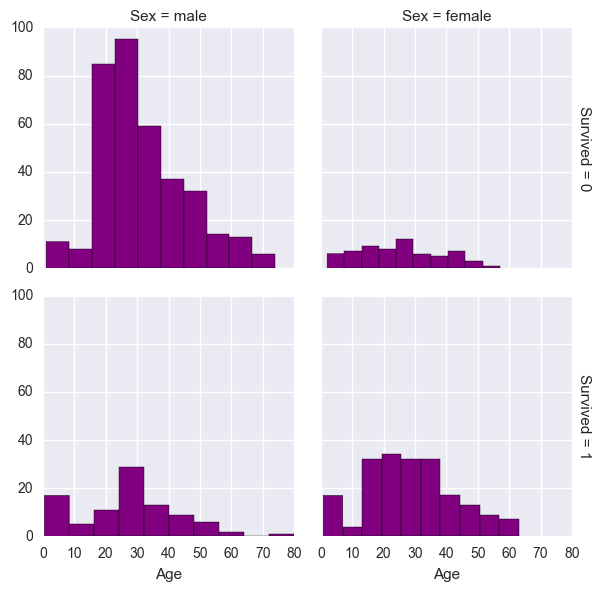

In [87]:
# Survival by Gender and Age
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple")


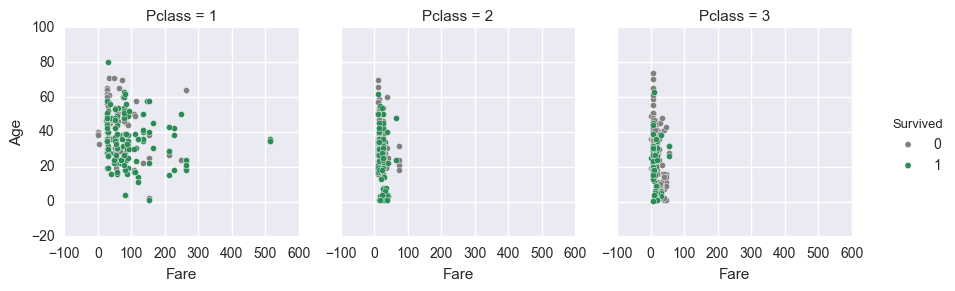

In [88]:
# Survival by Fare and Age factored by Pclsss
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
# Less older people survived

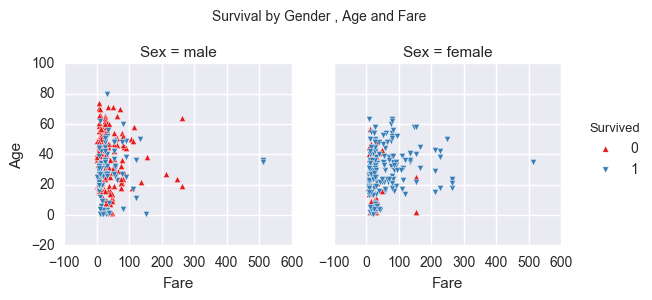

In [89]:
# Survival by Fare and Age factored by Sex 
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

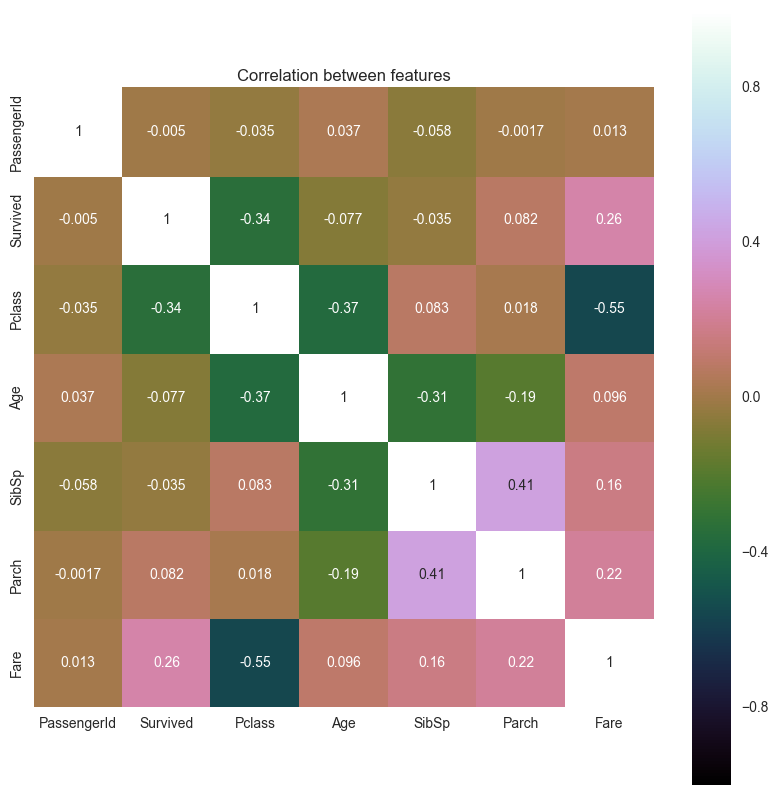

In [90]:
# Correlation study of features

corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between features')

In [91]:
#correlation of features with target variable
titanic.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

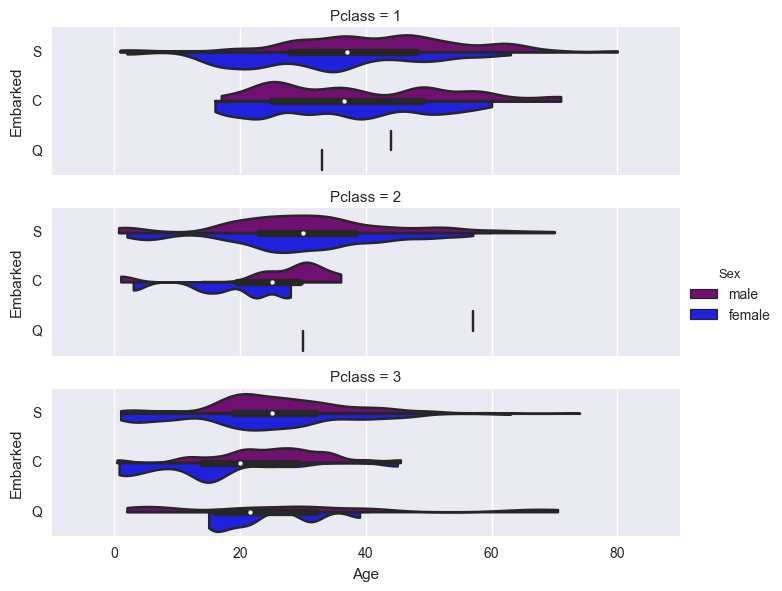

In [92]:
# sex distribution by Pclass and Embarked
g = sns.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=titanic[titanic.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5, 
                   palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, cut=0, bw=.2)

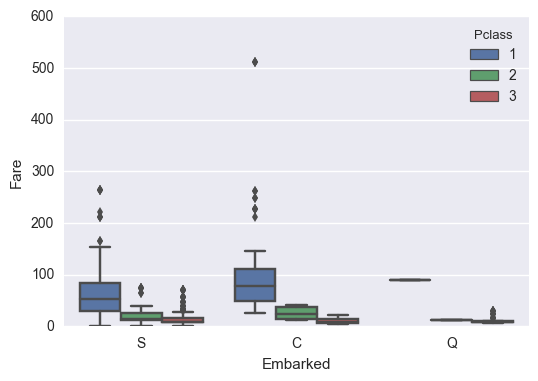

In [93]:
# Fare by Pclass and Embarked
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic)

# Higher median fare for first class from Port 'C'

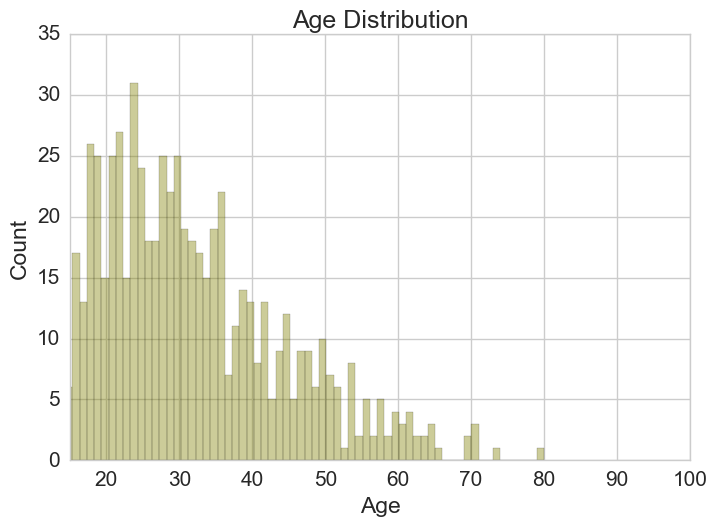

In [94]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="olive")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

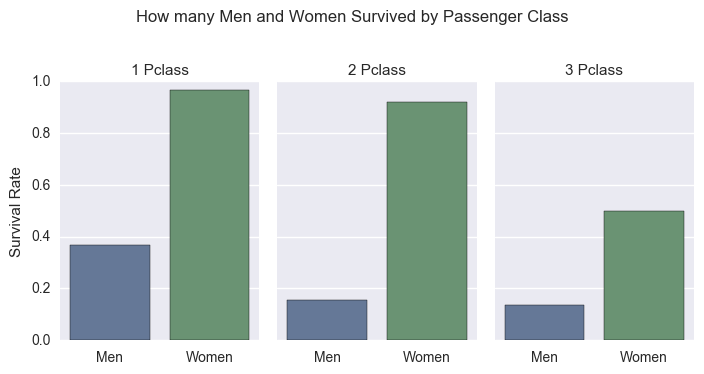

In [95]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class')
# Gender is a significiant factor for survival

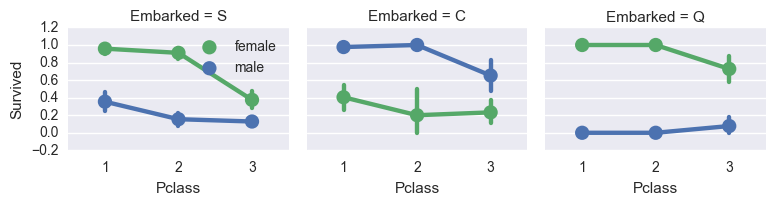

In [96]:
grid = sns.FacetGrid(titanic, col='Embarked', size=2.2, aspect=1.2, legend_out=False)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

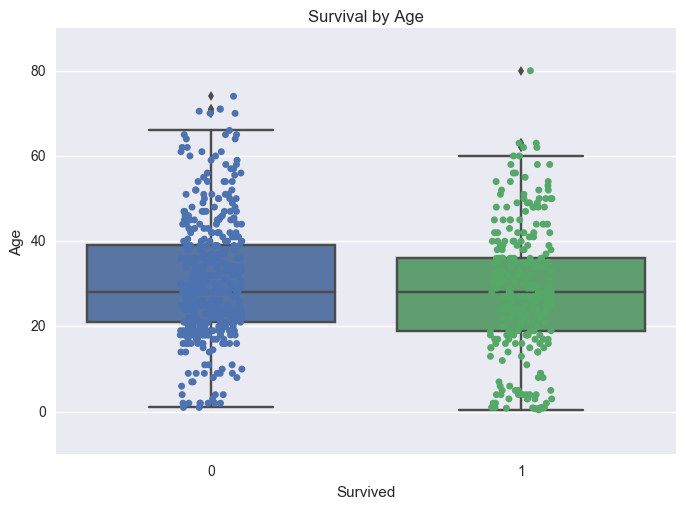

In [97]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="gray")
sns.plt.title("Survival by Age",fontsize=12)

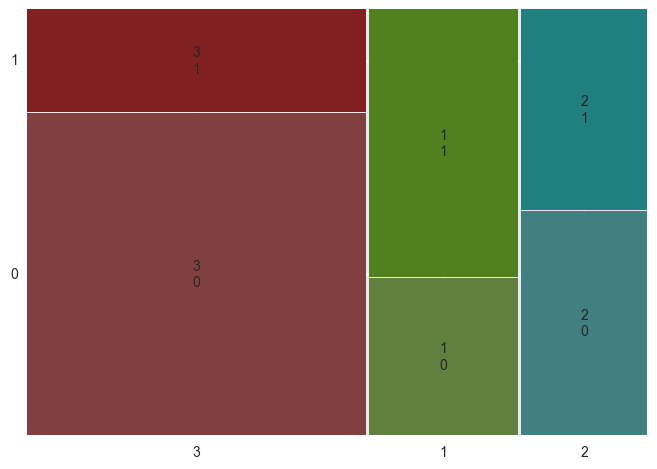

In [98]:
mosaic(titanic, ['Pclass', 'Survived'])
P.show()

## -------------Data Preprocessing and Transformation-------------

### Creat new column 'Deck'

In [99]:
def create_deck_col(df):
    df['Deck'] = df['Cabin'].str[0]
    
    df['DeckZ'] = df['Deck']
    df.DeckZ.fillna('Z', inplace=True)
    df['DeckZ'] = df['DeckZ'].map( {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'T': 6, 'F': 7, 'G': 8, 'Z': 0} ).astype(int)
    
    return df

In [100]:
titanic = create_deck_col(titanic)
titanic_test = create_deck_col(titanic_test)

#titanic["Deck"].unique() # 0 is for null values
#original: array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)
titanic["DeckZ"].unique()

array([0, 3, 5, 8, 4, 1, 2, 7, 6])

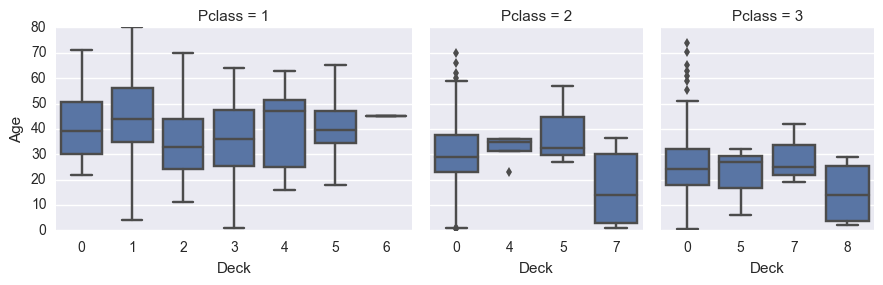

In [101]:
titanic_d = titanic.assign(Deck=titanic.DeckZ.astype(object)).sort_values(by="DeckZ")
g = sns.FacetGrid(titanic_d, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Deck", "Age");

For Deck column, there are a lot of null value.  Once null values replaced with Z, 
survival difference among Pclass are not significiant.

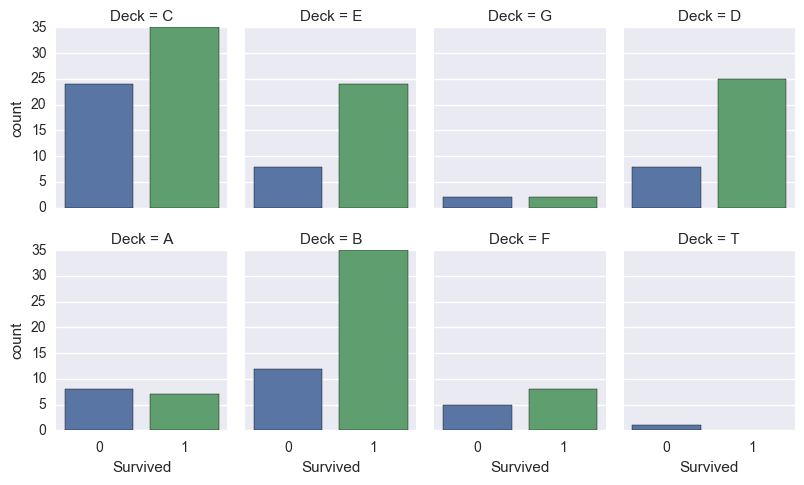

In [102]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=titanic[titanic.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8)

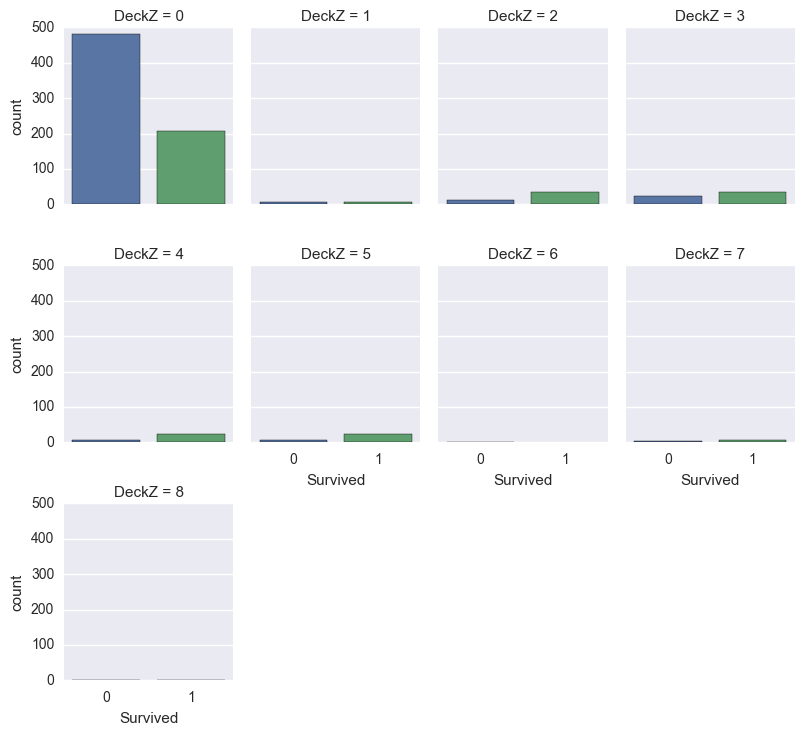

In [103]:
g = sns.factorplot("Survived", col="DeckZ", col_wrap=4,
                    data=titanic,
                    kind="count", size=2.5, aspect=.8)

### Create feature for length of name 

In [104]:
def create_name_length_col(df):
    # The .apply method generates a new series
    df["NameLength"] = df["Name"].apply(lambda x: len(x))

    #bins = [0, 20, 40, 57, 85]
    #group_names = ['short', 'okay', 'good', 'long']
    #df['NlengthD'] = pd.cut(df['NameLength'], bins, labels=group_names)
    df['NlengthD'] = df["Name"].apply(lambda x: round(len(x)/10))
    return df


In [105]:
titanic = create_name_length_col(titanic)
print(titanic["NlengthD"].value_counts())

2.0    428
1.0    204
3.0    162
4.0     68
5.0     25
6.0      3
8.0      1
Name: NlengthD, dtype: int64


[ 2.  5.  4.  1.  3.  8.  6.]


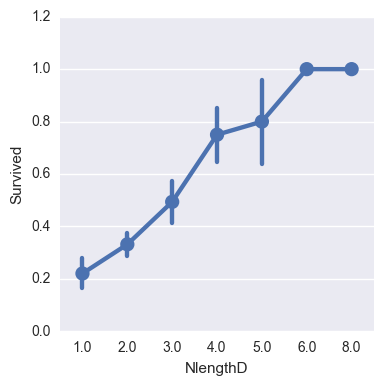

In [106]:
sns.factorplot(x="NlengthD", y="Survived", data=titanic)
print(titanic["NlengthD"].unique())

In [107]:
titanic_test = create_name_length_col(titanic_test)

### Create new column title 

In [108]:
def create_title_col(df):
    df['Title'] = df['Name'].str.extract('([A-Z]\w{0,}\.)', expand=True)
    
    df.loc[df["Title"] == "Mlle.", "Title"] = 'Miss.'
    df.loc[df["Title"] == "Ms.", "Title"] = 'Miss.'
    df.loc[df["Title"] == "Mme.", "Title"] = 'Mrs.'
    df.loc[df["Title"] == "Dona.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Lady.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Countess.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Capt.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Col.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Don.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Major.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Rev.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Sir.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Jonkheer.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Dr.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Master.", "Title"] = 'Rare.'
    
    df.loc[ df['Title'] == 'Mr.', 'TitleNum' ] = 1
    df.loc[ df['Title'] == 'Miss.', 'TitleNum'] = 2
    df.loc[ df['Title'] == 'Mrs.', 'TitleNum' ] = 3
    df.loc[ df['Title'] == 'Rare.', 'TitleNum' ] = 4
    
    return df

In [109]:
titanic = create_title_col(titanic)
titanic['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Rare.'], dtype=object)

In [110]:
titanic['TitleNum'].unique()

array([ 1.,  3.,  2.,  4.])

In [111]:
titanic[titanic['Title'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,DeckZ,NameLength,NlengthD,Title,TitleNum


In [112]:
#df['Title'].unique()
#array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
#       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', nan, 'Col.', 'Capt.',
#       'Countess.', 'Jonkheer.'], dtype=object)

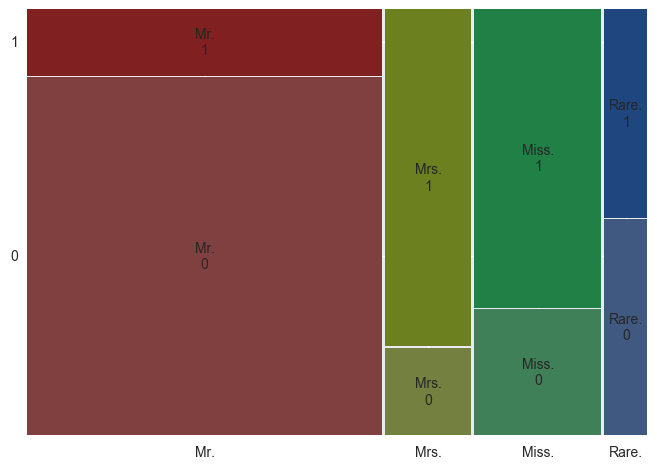

In [113]:
#from statsmodels.graphics.mosaicplot import mosaic
#plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['Title', 'Survived'])
P.show()

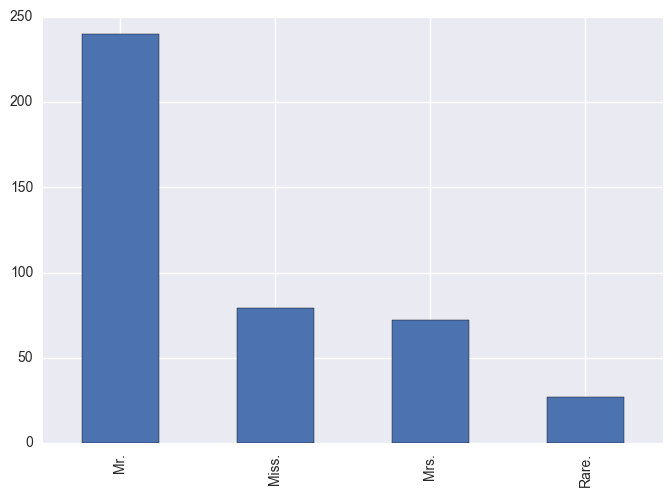

In [114]:
titanic_test = create_title_col(titanic_test)
titanic_test.Title.value_counts().plot(kind='bar')
P.show()

In [115]:
titanic_test['Title'].isnull().any()

False

### Engineering new column Gender with int, female:0, male: 1, child(younger than 16): 2

In [116]:
for i in range(4):
    print i, len(titanic[ (titanic['Sex'] == 'male') & (titanic['Pclass'] == i) ])

0 0
1 122
2 108
3 347


In [117]:
def create_gender_col(df):
    #df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )
    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    df.loc[ df['Age'] < 16, 'Gender' ] = 2
    return df

In [118]:
titanic = create_gender_col(titanic)
titanic.Gender.unique()

array([1, 0, 2])

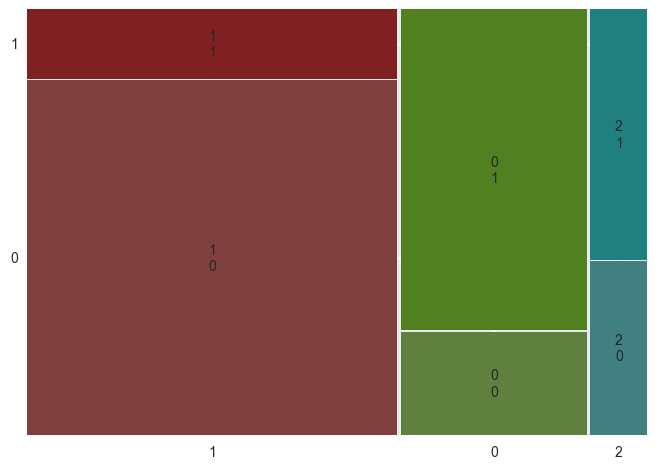

In [119]:
mosaic( titanic, ['Gender', 'Survived'] )
P.show()

In [120]:
titanic_test = create_gender_col(titanic_test)
titanic_test.Gender.unique()

array([1, 0, 2])

### Fill in missing data - Embarked and create new column - Port with int 
Embarked: Cherbourg (2), Southamption (1), and Queenstown (3)

In [121]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [122]:
titanic[ titanic['Embarked'].isnull() ][['Sex', 'Pclass', 'Embarked', 'Fare']].head(10)

,Sex,Pclass,Embarked,Fare
61,female,1,NaN,80.0
829,female,1,NaN,80.0


In [123]:
titanic[ (titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'S') ].Fare.median()

79.65

In [124]:
titanic[ (titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'C') ].Fare.median()

83.1583

In [125]:
titanic[ (titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'Q') ].Fare.median()

90.0

In [126]:
titanic['Port'] = titanic['Embarked']

In [127]:
titanic.loc[ titanic['Embarked'].isnull(), 'Port'] = 'S'

In [128]:
titanic[ titanic['Embarked'].isnull() ][['Sex', 'Pclass', 'Embarked', 'Fare', 'Port']]

,Sex,Pclass,Embarked,Fare,Port
61,female,1,NaN,80.0,S
829,female,1,NaN,80.0,S


In [129]:
def transform_port_num(df):
    df['Port'] = df['Port'].map( {'S': 1, 'C': 2, 'Q': 3} )
    return df   

In [130]:
titanic = transform_port_num(titanic)
titanic['Port'].unique()
#original: array(['S', 'C', 'Q'], dtype=object)

array([1, 2, 3])

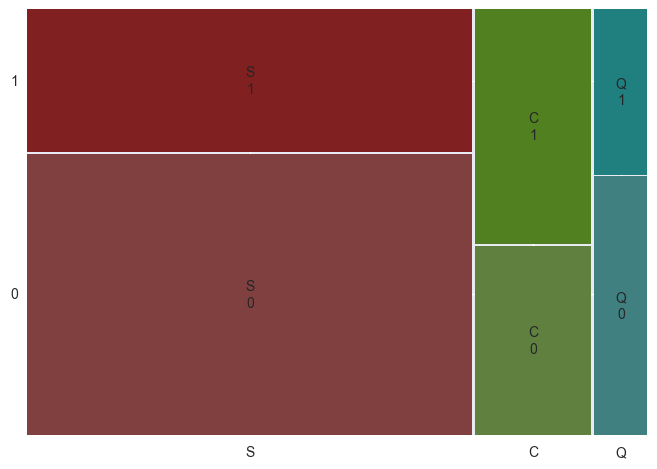

In [131]:
mosaic( titanic, ['Embarked', 'Survived'])
P.show()

In [132]:
titanic_test[ titanic_test['Embarked'].isnull() ][['Gender', 'Pclass', 'Embarked']]

,Gender,Pclass,Embarked


In [133]:
titanic_test['Port'] = titanic_test['Embarked']
titanic_test = transform_port_num(titanic_test)
titanic_test['Port'].unique()

array([3, 1, 2])

In [134]:
#titanic_test['Port'].unique()
#array(['Q', 'S', 'C'], dtype=object)

### Engineering new FamilySize column 

In [135]:
def create_familysize_col(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    df['FsizeD'] = 1
    df.loc[ (df['FamilySize'] > 1) & (df['FamilySize'] < 5), 'FsizeD'] = 2
    df.loc[ df['FamilySize'] >= 5, 'FsizeD'] = 3
    
    return df

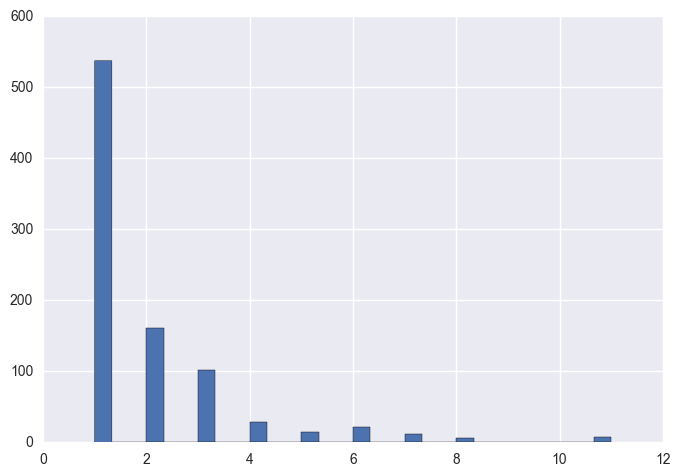

In [136]:
titanic = create_familysize_col(titanic)
titanic['FamilySize'].hist(bins=30)

In [137]:
titanic['FsizeD'].unique()

array([2, 1, 3])

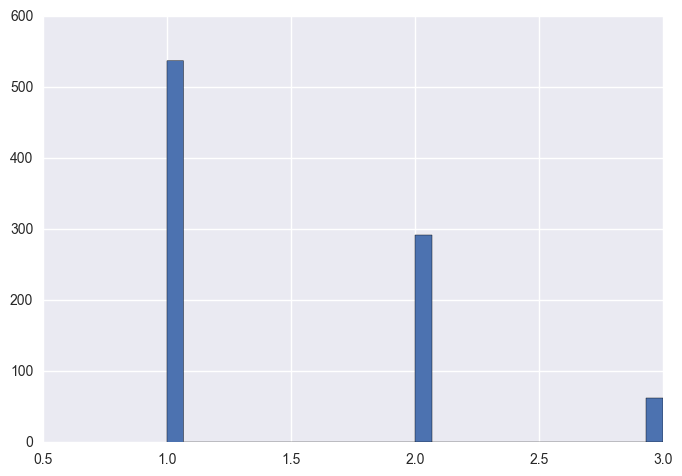

In [138]:
titanic['FsizeD'].hist(bins=30)

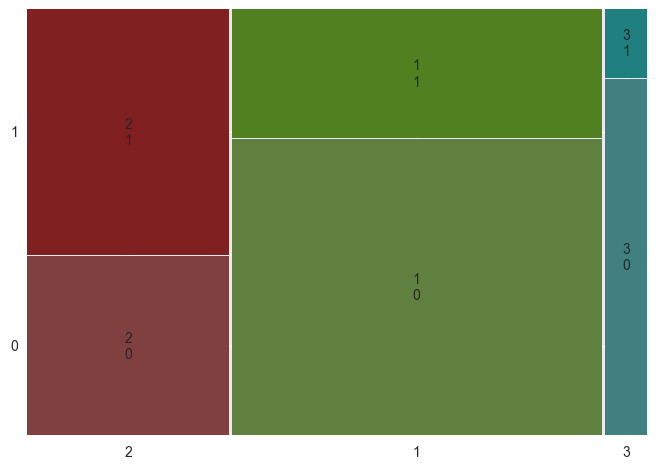

In [139]:
mosaic(titanic, ['FsizeD', 'Survived'])
P.show()

In [140]:
titanic_test = create_familysize_col(titanic_test)

### Create new column - TicketClean

In [219]:
titanic["TicketClean"] = titanic["Ticket"].str.extract('(\d{2,})', expand=True)

print("Rows with NaN: " + str(pd.isnull(titanic["TicketClean"]).nonzero()[0]))
print("Ticket number: ")
print(str(titanic["Ticket"].ix[179]))
print(str(titanic["Ticket"].ix[271]))
print(str(titanic["Ticket"].ix[302]))
print(str(titanic["Ticket"].ix[597]))
print(str(titanic["Ticket"].ix[772]))
print(str(titanic["Ticket"].ix[841]))
#print(str(titanic["Ticket"].ix[1077]))
#print(str(titanic["Ticket"].ix[1193]))

Rows with NaN: [179 271 302 597 772 841]
Ticket number: 
LINE
LINE
LINE
LINE
S.O./P.P. 3
S.O./P.P. 3


In [220]:
titanic["TicketClean"] = titanic["TicketClean"].apply(pd.to_numeric)
med1 = titanic["TicketClean"].median()
med2 = titanic["TicketClean"].median() + titanic["TicketClean"].std()
med3 = titanic["TicketClean"].median() - titanic["TicketClean"].std()
titanic.set_value(179, 'TicketClean', int(med1))
titanic.set_value(271, 'TicketClean', int(med1))
titanic.set_value(302, 'TicketClean', int(med1))
titanic.set_value(597, 'TicketClean', int(med1))
titanic.set_value(772, 'TicketClean', int(med2))
titanic.set_value(841, 'TicketClean', int(med2))

titanic["TicketClean"].head()

0      21171.0
1      17599.0
2    3101282.0
3     113803.0
4     373450.0
Name: TicketClean, dtype: float64

In [221]:
titanic_test['TicketClean'] = titanic_test['Ticket'].str.extract('(\d{2,})', expand=True)

print ("Test Rows with NaN: " + str(pd.isnull(titanic_test["TicketClean"]).nonzero()[0]))
print('Ticket number:')
print(str(titanic_test['Ticket'].ix[186]))
print(str(titanic_test['Ticket'].ix[302]))


Test Rows with NaN: [186 302]
Ticket number:
S.O./P.P. 2
S.O./P.P. 2


In [222]:
titanic_test['TicketClean'] = titanic_test['TicketClean'].apply(pd.to_numeric)
med1_t = titanic_test['TicketClean'].median()
med2_t = titanic_test['TicketClean'].median() + titanic_test['TicketClean'].std()
med3_t = titanic_test['TicketClean'].median() - titanic_test['TicketClean'].std()
print med2_t
titanic_test.set_value(186, 'TicketClean', int(med2_t))
titanic_test.set_value(302, 'TicketClean', int(med2_t))

titanic_test["TicketClean"].head()

625585.73


0     330911.0
1     363272.0
2     240276.0
3     315154.0
4    3101298.0
Name: TicketClean, dtype: float64

In [223]:
titanic_test[titanic_test['TicketClean'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,TitleNum,Gender,Port,FamilySize,FsizeD,TicketClean,AgeMean,AgeInterp,AgeRF,Age*Class


### Fill missing data in Fare (test data)

In [145]:
titanic[ titanic['Fare'].isnull() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,DeckZ,NameLength,NlengthD,Title,TitleNum,Gender,Port,FamilySize,FsizeD,TicketClean


In [146]:
titanic_test[ titanic_test['Fare'].isnull() ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,DeckZ,NameLength,NlengthD,Title,TitleNum,Gender,Port,FamilySize,FsizeD,TicketClean
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,...,0,18,1.0,Mr.,1.0,1,1,1,1,3701.0


In [147]:
titanic[ (titanic['Pclass'] == 3) & (titanic['Sex'] == 'male') & (titanic['Embarked'] == 'S') ].Fare.median()

8.05

In [148]:
titanic_test.loc[ titanic_test['PassengerId'] == 1044, 'Fare' ] = 8.05

In [149]:
titanic_test[ titanic_test['Fare'].isnull() ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,DeckZ,NameLength,NlengthD,Title,TitleNum,Gender,Port,FamilySize,FsizeD,TicketClean


### Engineering missing data in Age (median) 

In [150]:
median_ages = np.zeros((2,3))
for i in range(0,2):
    for j in range(0, 3):
        median_ages[i,j] = titanic[(titanic['Gender'] == i) & (titanic['Pclass'] == j+1)]['Age'].dropna().median()
print median_ages

[[ 35.  30.  26.]
 [ 42.  31.  27.]]


In [151]:
def fill_missing_age_median(df):
    df['AgeMean'] = df['Age']
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1), 'AgeMean'] = median_ages[i,j]      
    return df

In [152]:
titanic = fill_missing_age_median(titanic)
titanic[ titanic['Age'].isnull() ][['Gender', 'Pclass', 'Age', 'AgeMean']].head(10)

,Gender,Pclass,Age,AgeMean
5,1,3,NaN,27.0
17,1,2,NaN,31.0
19,0,3,NaN,26.0
26,1,3,NaN,27.0
28,0,3,NaN,26.0
29,1,3,NaN,27.0
31,0,1,NaN,35.0
32,0,3,NaN,26.0
36,1,3,NaN,27.0
42,1,3,NaN,27.0


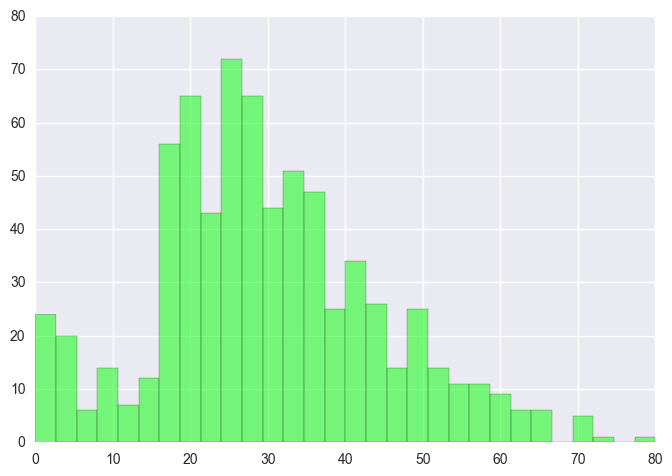

In [153]:
titanic['Age'].dropna().hist( bins=30, range=(0,80), alpha=.5, color='lime')
P.show()

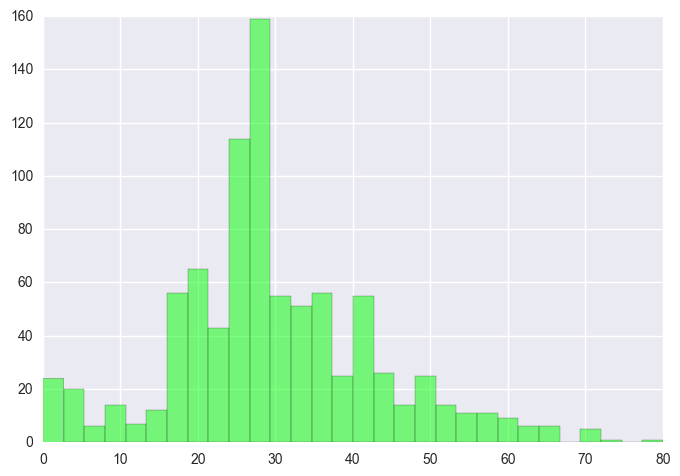

In [154]:
titanic['AgeMean'].hist( bins=30, range=(0,80), alpha=.5, color='lime')
P.show()

In [155]:
titanic_test = fill_missing_age_median(titanic_test)
        
titanic_test[ titanic_test.Age.isnull() ][['Gender', 'Pclass', 'Age', 'AgeMean']].head(10)


,Gender,Pclass,Age,AgeMean
10,1,3,NaN,27.0
22,0,1,NaN,35.0
29,1,3,NaN,27.0
33,0,3,NaN,26.0
36,0,3,NaN,26.0
39,1,3,NaN,27.0
41,1,1,NaN,42.0
47,1,3,NaN,27.0
54,1,2,NaN,31.0
58,1,3,NaN,27.0


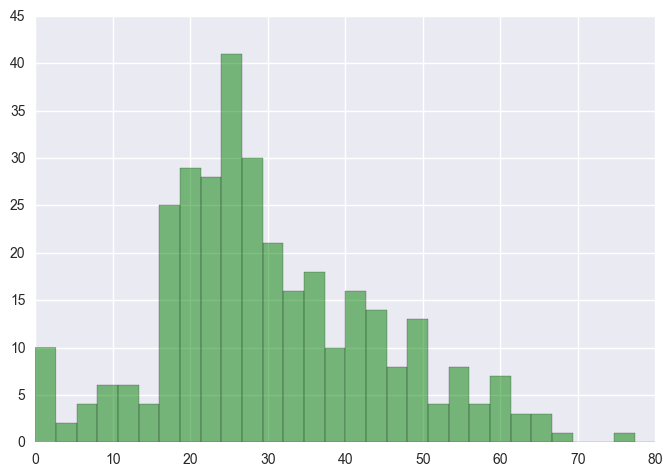

In [156]:
titanic_test['Age'].hist( bins=30, range=(0,80), alpha=.5, color='green')
P.show()

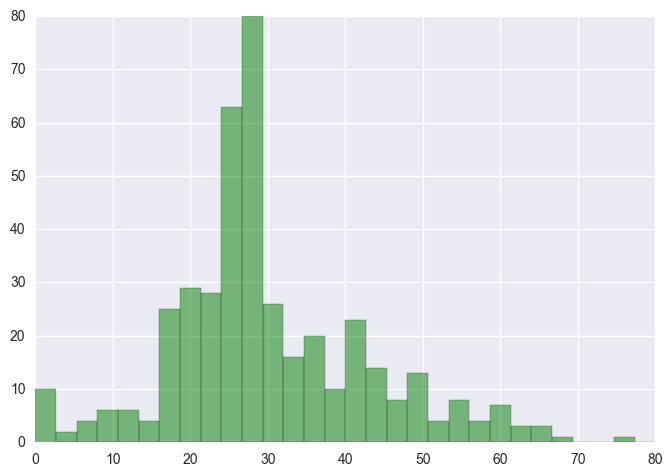

In [157]:
titanic_test['AgeMean'].hist( bins=30, range=(0,80), alpha=.5, color='green')
P.show()

In [158]:
### Re-engineering missing age with random number between mean and std

In [159]:
#df[ df['Age'].isnull() ].groupby(['Port', 'Gender', 'Pclass'])[['Gender', 'Age']].count()

In [160]:
#df[['Age', 'Port', 'Gender', 'Pclass']].dropna().groupby(['Port', 'Gender', 'Pclass']).mean()

In [161]:
#df[['Age', 'Port', 'Gender', 'Pclass']].dropna().groupby(['Port', 'Gender', 'Pclass']).agg([np.size, np.mean, np.std])

In [162]:
# generate random numbers between (mean - std) & (mean + std)

def generate_random(avg, std, sz):
    rand_1 = np.random.randint(avg - std, avg + std, size = sz)
    rand_2 = np.random.randint(avg - std , avg + std, size = sz)

### Reengineer missing age with dataframe interpolate (AgeInterp)

In [163]:
def creat_missing_age_interpolate(df):
    df['AgeInterp'] = df['Age']
    df['AgeInterp'] = df[ ['AgeInterp']].interpolate().astype(int)
    return df

In [164]:
titanic = creat_missing_age_interpolate(titanic)
titanic[ titanic['AgeInterp'].isnull() ][['Age', 'AgeInterp']]

,Age,AgeInterp


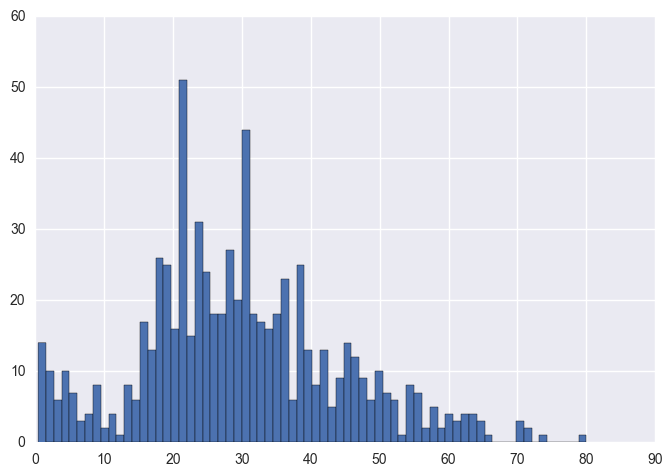

In [165]:
titanic['Age'].dropna().hist(bins=70)
P.show()

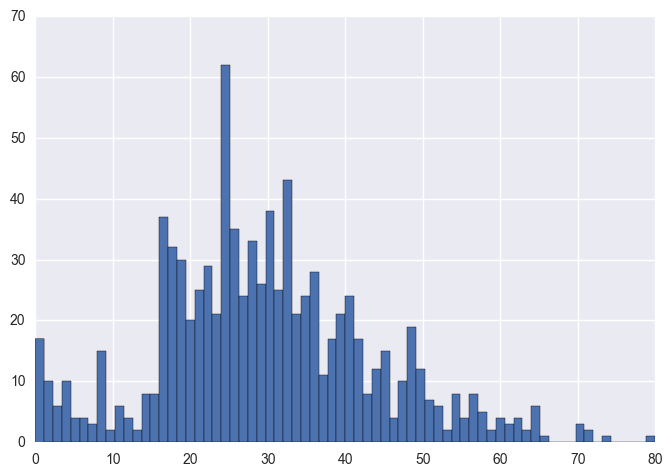

In [166]:
titanic['AgeInterp'].hist(bins=70)
P.show()

In [167]:
titanic_test = creat_missing_age_interpolate(titanic_test)
titanic_test[ titanic_test['AgeInterp'].isnull() ][['Age', 'AgeInterp']]

,Age,AgeInterp


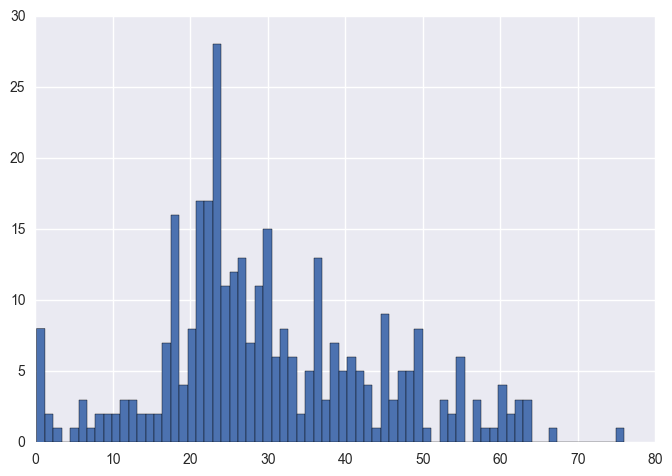

In [168]:
titanic_test.Age.dropna().hist(bins=70)
P.show()

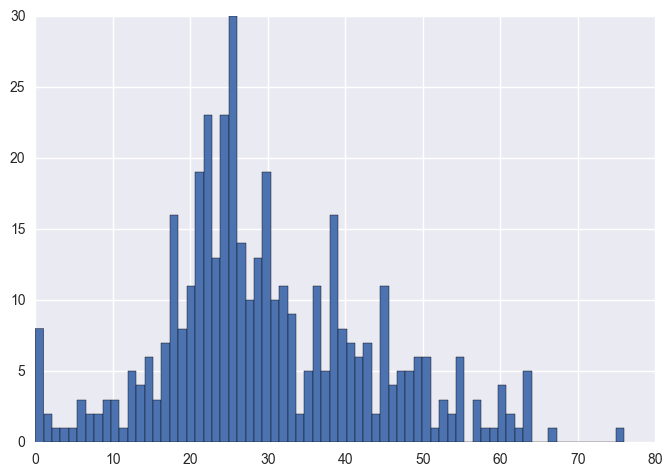

In [169]:
titanic_test.AgeInterp.hist(bins=70)
P.show()

### Predicting missing values in age using Random Forest Regression

In [170]:

def fill_missing_age_rf(df):
    
    #Feature set
    df['AgeRF'] = df['Age']
    age_df = df[['AgeRF', 'SibSp','Parch', 'Fare', 'TitleNum','NlengthD', 'Gender', 'Port', 'Pclass', 'FsizeD','DeckZ']]
    
    # Split sets into train and test
    train  = age_df.loc[ (age_df.AgeRF.notnull()) ]# known Age values
    test = age_df.loc[ (age_df.AgeRF.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.AgeRF.isnull()), 'AgeRF' ] = predictedAges 
    
    return df

In [171]:
titanic = fill_missing_age_rf(titanic)

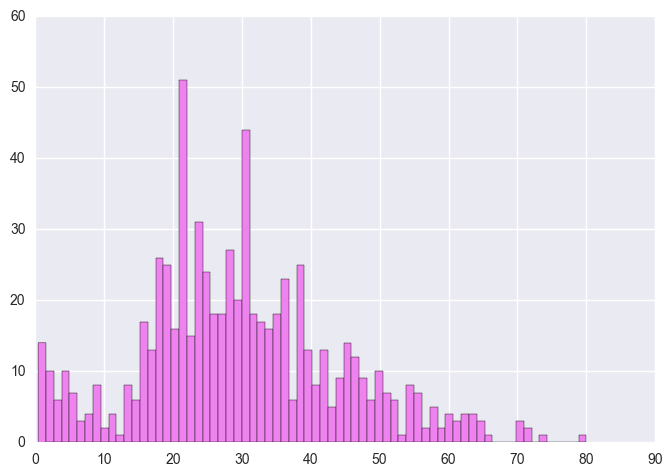

In [172]:
titanic.Age.hist(bins=70, color='violet')
P.show()

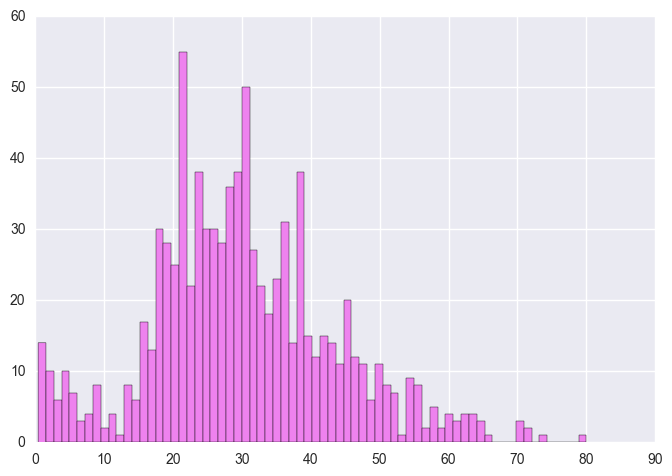

In [173]:
titanic.AgeRF.hist(bins=70, color='violet')
P.show()

In [174]:
titanic_test = fill_missing_age_rf(titanic_test)

### Engineering new column Age*Class 

In [175]:
def create_ageclass_col(df):
    df['Age*Class'] = df.AgeInterp * df.Pclass
    
    #bins = [0, 20, 40, 57, 85]
    #group_names = ['a', 'b', 'c', 'd']
    #df['Age*ClassD'] = pd.cut(df['Age*Class'], bins, labels=group_names)
    
    return df

In [176]:
titanic = create_ageclass_col(titanic)


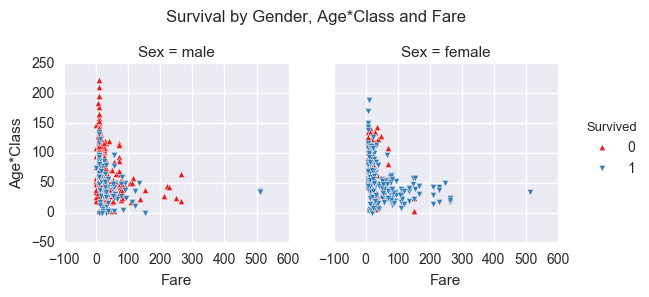

In [177]:
# Survival by Age*Class and Age factored by Gender 
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age*Class",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender, Age*Class and Fare')

In [178]:
#titanic['Age*Class'].value_count()
#titanic['Age*Class'].hist(bins=16)
#P.show()

#mosaic(titanic, ['Age*Class', 'Survived'])
#P.show()

In [179]:
titanic_test = create_ageclass_col(titanic_test)

## -------------Set up train_data and test_data------------- 

In [180]:
titanic.dtypes[titanic.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Deck        object
Title       object
dtype: object

In [224]:
#titanic.info()
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Deck            True
DeckZ          False
NameLength     False
NlengthD       False
Title          False
TitleNum       False
Gender         False
Port           False
FamilySize     False
FsizeD         False
TicketClean    False
AgeMean        False
AgeInterp      False
AgeRF          False
Age*Class      False
dtype: bool

In [225]:
#titanic_test.info()
titanic_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Deck            True
DeckZ          False
NameLength     False
NlengthD       False
Title          False
TitleNum       False
Gender         False
Port           False
FamilySize     False
FsizeD         False
TicketClean    False
AgeMean        False
AgeInterp      False
AgeRF          False
Age*Class      False
dtype: bool

In [183]:
test_passengerID = titanic_test[['PassengerId']].values

In [247]:
predictors = [ 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'TicketClean', 'Port', 'SibSp', 'Parch', 'DeckZ']
features_train = titanic[predictors]
labels_train = titanic["Survived"]
features_test = titanic_test[predictors]

## -------------Trying out Different Machine Learning Algorithms-------------

In [254]:
def test_harness(NL):
    results={}
    def test_model(clf):
        from sklearn.model_selection import KFold 
        cv = KFold(n_splits=10)
        fbeta_scorer = make_scorer(fbeta_score, beta=1)
        cohen_scorer = make_scorer(cohen_kappa_score)
        accu = cross_val_score(clf, features, labels, cv=cv)
        fbeta = cross_val_score(clf, features, labels, cv=cv,scoring=fbeta_scorer)
        cohen = cross_val_score(clf, features, labels, cv=cv,scoring=cohen_scorer)
        scores=[accu.mean(),fbeta.mean(),cohen.mean()]
        return scores

    # Decision Tree
    clf = tree.DecisionTreeClassifier()
    results["Decision Tree"]=test_model(clf)
    # Logistic Regression
    clf = LogisticRegression()
    results["Logistic Regression"]=test_model(clf)
    # SVM Linear
    clf = svm.LinearSVC()
    results["Linear SVM"]=test_model(clf)
    # SVM RBF
    clf = svm.SVC()
    results["RBF SVM"]=test_model(clf)
    # Gaussian Bayes
    clf = GaussianNB()
    results["Gaussian Naive Bayes"]=test_model(clf)
    # Random Forest
    clf=RandomForestClassifier()
    results["Random Forest"]=test_model(clf)
    # AdaBoost with Decision Trees
    clf=AdaBoostClassifier()
    results["AdaBoost"]=test_model(clf)
    # SGDC
    clf=SGDClassifier()
    results["SGDC"]=test_model(clf)
    # Bagging
    clf=BaggingClassifier()
    results["Bagging"]=test_model(clf)
    # Neural Networks
    if NL:
        clf=MLPClassifier()
        results["Neural Network"]=test_model(clf)
    
    # plot the scores
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Accuracy","F-Score", "Cohen Kappa"] 
    results=results.sort(columns=["Accuracy","F-Score", "Cohen Kappa"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0,1])
    return plt

/Users/LiWang/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/LiWang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<module 'matplotlib.pyplot' from '/Users/LiWang/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

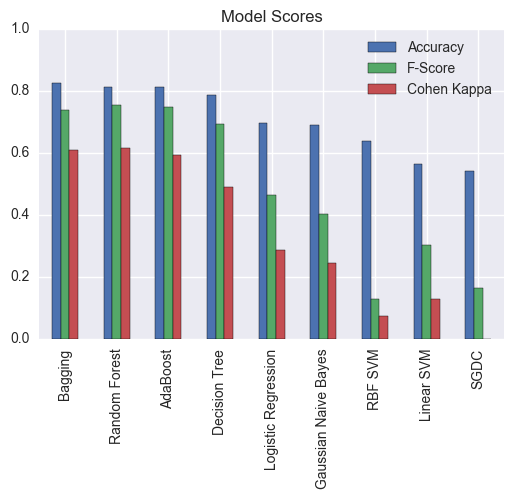

In [255]:
features = features_train
labels = labels_train

test_harness(NL=False)

Bagging, RandomForest and AdaBoost have better accuracy scores

In [275]:
def write_to_csv(filename, predictions):   
    predictions=predictions.astype(int)
    submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

    submission.to_csv(filename, index=False)

#### DecisionTree Classifier

In [294]:

#from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(random_state=0)
dtclf.fit(features_train, labels_train)
output = dtclf.predict(features_test)
#print output

write_to_csv("ml_decisiontree3.csv", output)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(dtclf, features_train, labels_train, cv=kf)
# Take the mean of the scores (because there is one for each fold)
print(scores.mean())

# file, score, actual
# 2,, 0.59809 
# 3, 0.767676767677, 0.71770

0.767676767677


#### K nearest neighbour

In [295]:

#from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 35
knnclf = KNeighborsClassifier(n_neighbors)
knnclf.fit(features_train, labels_train)
output = knnclf.predict(features_test)
#print len(output)

write_to_csv("ml_knn3.csv", output)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(knnclf, features_train, labels_train, cv=kf)
# Take the mean of the scores (because there is one for each fold)
print(scores.mean())

# file, score, actual
# 2,,  0.6411
# no result?
# 3, 0.654320987654, 0.60766



0.654320987654


#### GaussianNB 

In [296]:
#from sklearn.naive_bayes import GaussianNB

gnbclf = GaussianNB()
gnbclf.fit(features_train, labels_train)
gnboutput = gnbclf.predict(features_test)
#print len(output)

write_to_csv("ml_gaussianNB7.csv", output)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(gnbclf, features_train, labels_train, cv=kf)
# Take the mean of the scores (because there is one for each fold)
print(scores.mean())
 
# file, score, actual
# 5,, 0.73684 
# 6,, 0.73206
# 7, 0.687991021324, 0.66986


0.687991021324


#### Adaboost Classifier

In [297]:
#from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
adaclf.fit(features_train, labels_train)
output = adaclf.predict(features_test)
#print len(output)

write_to_csv("ml_adoboost11.csv", output)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(adaclf, features_train, labels_train, cv=kf)
# Take the mean of the scores (because there is one for each fold)
print(scores.mean())

# file, score, actual
# 2,, 0.75120
# 7,, 0,74641
# 10,, 0.75120
# 11, 0.800224466891, 0.76077

0.800224466891


#### RandomForest Classifier

In [299]:

rfclf = RandomForestClassifier(n_estimators = 66, max_features=3, max_depth=None, min_samples_split=2)
rfclf.fit(features_train, labels_train)
output = rfclf.predict(features_test)
#print len(output)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(rfclf, features_train, labels_train, cv=kf)
# Take the mean of the scores (because there is one for each fold)
print(scores.mean())

write_to_csv("ml_randomForest50.csv", output)
 
# score 0.76077, 0.76555, 0.77033, 0.73206, 
# file, cross_v, actual
# 20, 0.83164983165, 0.76555
# 22, 0.827160493827, 0.76555
# 50, 0.835016835017, 0.74163 ( too much noise?)


0.835016835017


## -------------Pick the best fit Algorithms-------------

From the above cross_validation and actual score, RandomForest and AdaBooster have better accuracy 

###  Feature Selection

#### By SelectKBest

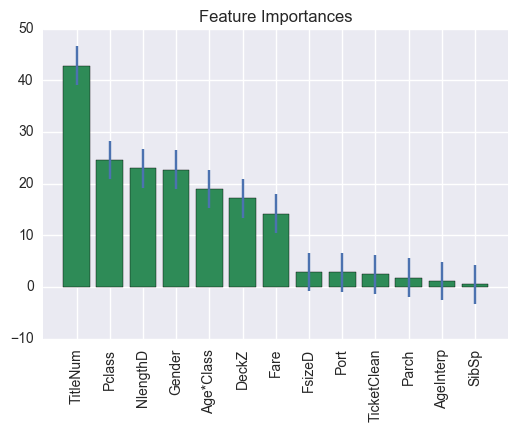

In [287]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import KFold
%matplotlib inline
import matplotlib.pyplot as plt

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.figure()
plt.title("Feature Importances")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=np.std([indices]), align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()



From the result of running sklearn.feature_selection.SelectKBest, the seven more important features in sequences are:
'TitleNum', 'Pclass', 'NlengthD', 'Gender', 'Age*Class', 'DeckZ', 'Fare'

#### By RF features_importances

[ 0.17839868  0.04941631  0.09555698  0.12096645  0.09302039  0.1163948
  0.05341901  0.03951293  0.14411054  0.02072645  0.02701536  0.01450121
  0.0469609 ]
[ 0  8  3  5  2  4  6  1 12  7 10  9 11]


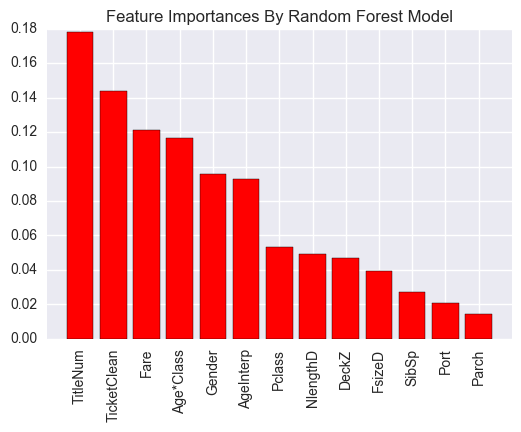

In [286]:

importances = forest.feature_importances_
print importances

std = np.std([forest.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices

sorted_important_features = []
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()

In [ ]:
From the ranking of RandomForestClassifier.feature_importances_, the 3 least important features are:
'SibSp', 'Port', 'Parch'

#### By Recursive Feature Elimination

In [300]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

# create the RFE model and select 3 attributes
#rfe = RFE(rfclf, 9)
rfe = RFE(adaclf, 9)

rfe = rfe.fit(features_train, labels_train)

# summarize the selection of the attributes
#print features_train.dtypes.index
print features_train.columns.values.tolist()
print(rfe.support_)
print(rfe.ranking_)

['TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'TicketClean', 'Port', 'SibSp', 'Parch', 'DeckZ']
[False  True  True  True  True  True False False  True False  True  True
  True]
[2 1 1 1 1 1 5 3 1 4 1 1 1]


By running Recursive Feature Elimination for RandomForestClassifier, the best 10 features result are consistant as following:
'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'TicketClean', 'DeckZ'

By running Recursive Feature Elimination for RandomForestClassifier, the best 10 features result are consistant as following:
'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'TicketClean', 'SibSp', 'Parch', 'DeckZ']


Pick the ten best features.
[ 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'TicketClean', 'DeckZ']

In [324]:
#predictors = [ 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'TicketClean', 'DeckZ']
predictors = [ 'TitleNum', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'TicketClean']
features_train = titanic[predictors]
labels_train = titanic["Survived"]
features_test = titanic_test[predictors]


#### Scaler

In [327]:

mmscaler = MinMaxScaler()
features_backup = features_train
features_train_mmscaler = mmscaler.fit_transform(features_train)
pd.DataFrame(features_train_scaler).head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.142857,0.5,0.014151,0.2750,0.297297,1.0,0.5,0.006653,0.000
1,0.666667,0.571429,0.0,0.139136,0.4750,0.171171,0.0,0.5,0.005501,0.375
2,0.333333,0.142857,0.0,0.015469,0.3250,0.351351,1.0,0.0,0.999989,0.000
3,0.666667,0.428571,0.0,0.103644,0.4375,0.157658,0.0,0.5,0.036527,0.375
4,0.000000,0.142857,0.5,0.015713,0.4375,0.472973,1.0,0.0,0.120263,0.000


#### Preprocessing Data

In [ ]:
'''
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
cat_vars=['Embarked','Sex',"Title","FsizeD","NlengthD",'Deck']
for items in cat_vars:
    encoder.fit(titanic[items])
    titanic[items]=encoder.transform(titanic[items])

for items in cat_vars:
    encoder.fit(titanic_test[items])
    titanic_test[items]=encoder.transform(titanic_test[items])

    
titanic.head()
'''
 
# For SVM
'''
from sklearn import preprocessing

stdscaler = preprocessing.StandardScaler().fit(features_train)
features_train_stdscaler = scaler.transform(features_train)

clf = svm.SVC(C=1).fit(features_train_stdscaler, labels_train)

features_test_stdscaler = stdscaler.transform(features_test)
clf.score(features_test_stdscaler, labels_test)  
'''

### Get the best fitting parameters for RandomForest

In [325]:
from sklearn.model_selection import KFold

# no scaler
features = features_train
# yes scaler
#features = features_train_mmscaler

labels = labels_train
cv = KFold(n_splits=5)

parameters = {'n_estimators': [10,20,30,40,50,60],
               'min_samples_split' :[2,3,4,5,6],
               'min_samples_leaf' : [1,2,3,4]
             }

clf = RandomForestClassifier()
grid_obj_rf = GridSearchCV(clf, parameters, cv=cv)
grid_fit_rf = grid_obj.fit(features, labels)
best_clf = grid_fit_rf.best_estimator_ 

best_clf.fit(features,labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Train Data and Run Test Date with RandomForestClassifier 

In [ ]:
from sklearn.cross_validation import KFold

# different set of parameters 

# param for -28 score 0.79426
#rf = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=9, min_samples_split=6, min_samples_leaf=4)

# param for -37 score 0.75120
#rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#            max_depth=None, max_features='auto', max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=2,
#            min_samples_split=5, min_weight_fraction_leaf=0.0,
#            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
#            verbose=0, warm_start=False)


In [326]:
from sklearn.cross_validation import KFold

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rf.fit(features_train, labels_train)

# produce output 
output = rf.predict(features_test)
#output = best_clf.predict(features_test)
#print len(output)

write_to_csv("ml_randomForest56.csv", output)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
#scores = cross_validation.cross_val_score(rf, features, labels_train, cv=kf)
scores = cross_validation.cross_val_score(best_clf, features, labels_train, cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

# file, score, actual 
# 23, 0.833894500561, 0.77512, 
# 25, 0.842873176207, 0.76077, 
# 27, 0.841750841751, 0.77033, 
# 28, 0.843995510662, 0.79426
# 51, 0.851851851852, 0.75120 (rf)
# 52, 0.843995510662, 0.75120 (best_clf)
# 53, 0.83950617284,  0.7607
# 54, 0.845117845118, 0.7607
# 56, 0.811447811448, 




0.811447811448


### Get the best fitting parameters for AdaBoost

In [313]:
from sklearn import grid_search
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
parameters = {'n_estimators' : [5, 10, 30, 40, 50, 100,150], 
              'learning_rate' : [0.1, 0.5, 1, 1.5, 2, 2.5], 
              'algorithm' : ('SAMME', 'SAMME.R')}
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8))
grid_obj_ada = grid_search.GridSearchCV(ada_clf, parameters, cv = cv)
grid_obj_ada.fit(features, labels)

print adaclf.best_estimator_
print adaclf.best_score_


TypeError: 'KFold' object is not iterable

In [ ]:
ada_clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
ada_clf.fit(features_train, labels_train)
output = ada_clf.predict(features_test)
#print len(output)

write_to_csv("ml_adoboost20.csv", output)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(ada_clf, features_train, labels_train, cv=kf)
# Take the mean of the scores (because there is one for each fold)
print(scores.mean())

# file, score, actual 

